# The transfer function measurement that we want to fit.

In [1]:
from control import *
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.fftpack import *
import sys
sys.path.append('../')
from diaggui_data2list import *

list1=diaggui_data2list('autofit_sample_data_complex.txt')
# list1=diaggui_data2list('TF_MICH2DARM_20191016.txt')
list1=np.array(list1)
sample_f=list1[:,0]
sample_tf_real=list1[:,1]
sample_tf_imag=list1[:,2]
sample_tf_complex=sample_tf_real+1j*sample_tf_imag
plt.loglog(sample_f,np.abs(sample_tf_complex))

# Use kagraControl.systemID.measurement to define a measurement object.
declaring the type of the measurement as well as passing the measured data.

In [2]:
from kagraControl.systemID import measurement
measObj1=measurement(type='complex',
                   f=sample_f,
                   tf_real=sample_tf_real,
                   tf_imag=sample_tf_imag)

Zero Frequency data omitted


# (Yet to be implemented) Alternatively, we can declare an empty measurement object and then input the measurements.

In [3]:
# measObj2=measurement()
# measObj2.f=sample_f,
# measObj2.

# Specify the order of the fit in the form of 
[number of simple zeros, number of simple poles, number of complex zeros, number of complex poles]

In [4]:
measObj1.order=[0,0,2,4]
measObj1.zpkfit()

bounds not specified, using measurement frequency bounds.


In [5]:
# measObj1.var_fit

# Check the fitting variables and use var2tf to convert the variables to transfer function

In [6]:
from kagraControl.systemID import var2tf
print(measObj1.var_fit)
tf_fit=var2tf(var=measObj1.var_fit, order=measObj1.order)
print(tf_fit)
# print(type(tf_fit))

[55.51792597322385, 958874.565840384, 0.9946771324782694, 2.511519908090122, 55.51794001191094, 243715.16934089153, 0.8950956376962148]

                  4.254e+06 s^2 + 1548 s + 5.177e+11
----------------------------------------------------------------------
1.217e+05 s^4 + 3.03e+05 s^3 + 1.481e+10 s^2 + 3.684e+10 s + 5.783e+11



# Compare fit with measurement

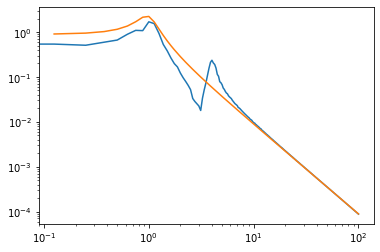

In [7]:
plt.loglog(sample_f,np.abs(sample_tf_complex))
plt.loglog(measObj1.f,np.abs(tf_fit.horner(1j*np.pi*2*np.array(measObj1.f))[0][0]))

# Fit not good, define initial guess:

In [8]:
measObj1.tf0=[3.2,15,0.6,9,5,7,0.8]
measObj1.zpkfit()

bounds not specified, using measurement frequency bounds.


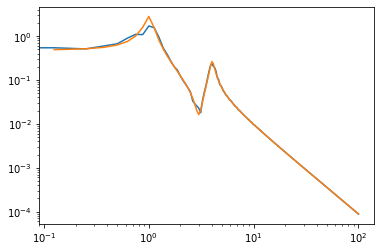

In [9]:
tf_fit=var2tf(var=measObj1.var_fit, order=measObj1.order)
plt.loglog(sample_f,np.abs(sample_tf_complex))
plt.loglog(measObj1.f,np.abs(tf_fit.horner(1j*np.pi*2*np.array(measObj1.f))[0][0]))

# Or, define bounds

In [16]:
from kagraControl.systemID import default
default

{'min_Q': 0.5, 'max_Q': 1000000.0, 'min_k': -1000.0, 'max_k': 1000.0}

In [10]:
measObj1.tf0=None
measObj1.bounds=[[0.5,5],[0.5,1e2],[0.5,5],[0.5,1e2],[0.5,5],[0.5,1e2],[-10,10]]
measObj1.zpkfit()

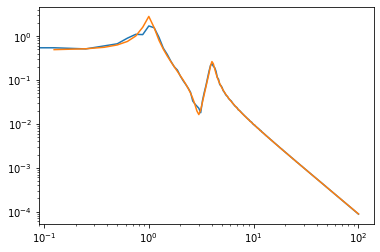

In [11]:
tf_fit=var2tf(var=measObj1.var_fit, order=measObj1.order)
plt.loglog(sample_f,np.abs(sample_tf_complex))
plt.loglog(measObj1.f,np.abs(tf_fit.horner(1j*np.pi*2*np.array(measObj1.f))[0][0]))

# Read and write fitted measurements.

In [18]:
measObj1.__dict__

{'type': 'complex',
 'f': [0.125,
  0.25,
  0.375,
  0.5,
  0.625,
  0.75,
  0.875,
  1.0,
  1.125,
  1.25,
  1.375,
  1.5,
  1.625,
  1.75,
  1.875,
  2.0,
  2.125,
  2.25,
  2.375,
  2.5,
  2.625,
  2.75,
  2.875,
  3.0,
  3.125,
  3.25,
  3.375,
  3.5,
  3.625,
  3.75,
  3.875,
  4.0,
  4.125,
  4.25,
  4.375,
  4.5,
  4.625,
  4.75,
  4.875,
  5.0,
  5.125,
  5.25,
  5.375,
  5.5,
  5.625,
  5.75,
  5.875,
  6.0,
  6.125,
  6.25,
  6.375,
  6.5,
  6.625,
  6.75,
  6.875,
  7.0,
  7.125,
  7.25,
  7.375,
  7.5,
  7.625,
  7.75,
  7.875,
  8.0,
  8.125,
  8.25,
  8.375,
  8.5,
  8.625,
  8.75,
  8.875,
  9.0,
  9.125,
  9.25,
  9.375,
  9.5,
  9.625,
  9.75,
  9.875,
  10.0,
  10.125,
  10.25,
  10.375,
  10.5,
  10.625,
  10.75,
  10.875,
  11.0,
  11.125,
  11.25,
  11.375,
  11.5,
  11.625,
  11.75,
  11.875,
  12.0,
  12.125,
  12.25,
  12.375,
  12.5,
  12.625,
  12.75,
  12.875,
  13.0,
  13.125,
  13.25,
  13.375,
  13.5,
  13.625,
  13.75,
  13.875,
  14.0,
  14.125,
  14.25,

In [19]:
from kagraControl.systemID import write_measurement
write_measurement(measObj1,filename='systemID_example')

In [13]:
measObj2=measurement(filename='SR2_TMP2TMP2')
measObj2.__dict__==measObj1.__dict__

True

# Modify measurements, add measurements for more averages.